<a href="https://colab.research.google.com/github/Swarnlataaa/Basic_sentiment_Analysis/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas textblob matplotlib

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [2]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


In [3]:
# Load your dataset (change the file path accordingly)
#file_path = '/content/drive/My Drive/test.csv'
#df = pd.read_csv(file_path)
# Load your dataset with the correct encoding
file_path = '/content/drive/My Drive/test.csv'
df = pd.read_csv(file_path, encoding='latin-1')


In [4]:
# Preprocess the 'text' column to handle non-string values
df['text'] = df['text'].fillna('').astype(str)

In [5]:
# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [6]:
# Apply sentiment analysis to your dataset
df['sentiment'] = df['text'].apply(analyze_sentiment)


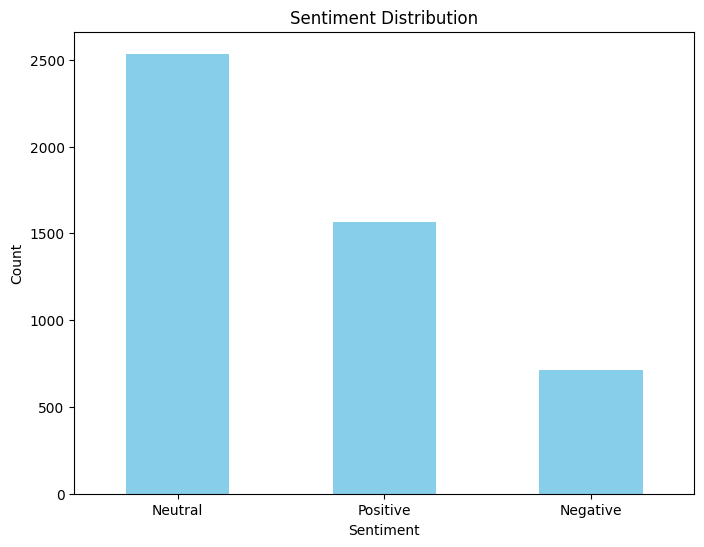

In [7]:
# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


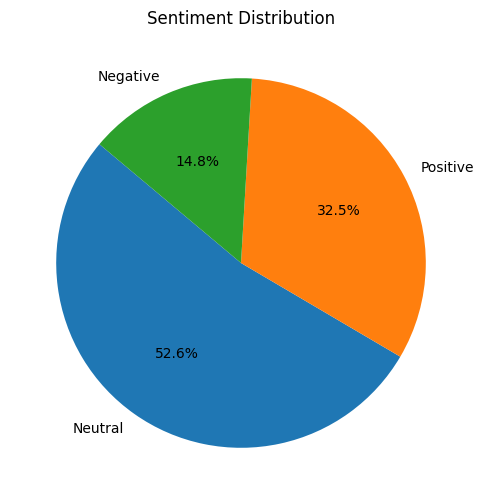

In [8]:
# Create a pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()


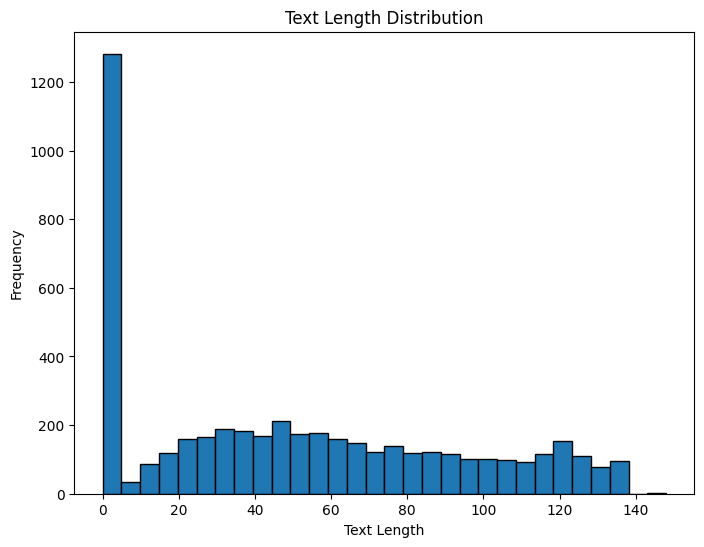

In [9]:
# Create a histogram of text length
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=30, edgecolor='k')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


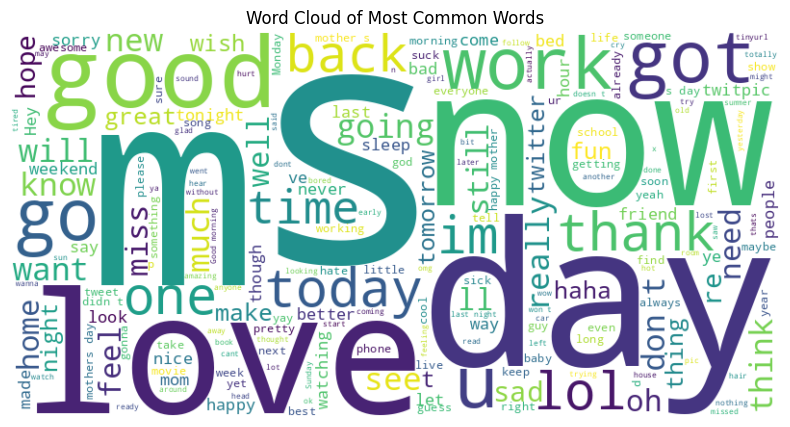

In [10]:
from wordcloud import WordCloud

# Create a word cloud for the most common words
text_concatenated = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_concatenated)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()
